# ESG profile Key-Initiatives (KIs) from Companies' Annual reports
> ### To extract KIs from Annual reports using NLP

In [1]:
# Import neccessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import requests
from bs4 import BeautifulSoup as soup

In [15]:
# LIST OF FORTUNE500 / FORBES2000 Companies in 2020 --> https://www.forbes.com/global2000
url = 'https://www.forbes.com/global2000/#105d0604335d'
raw = requests.get(url)

raw

<Response [200]>

In [14]:
# Table Data extraction

data = []
table = raw.find('table', attrs={'class':'fbs-table organization'})
table_body = table.find('tbody')
table_rows = table_body.findAll('tr')

for row in table_rows:
    cols = row.find_all('td')
    cols = [element.text.strip() for element in row]
    data.append([element for element in cols if element])

data


AttributeError: 'Response' object has no attribute 'find'

In [72]:
# Group list of companies by sectors (https://en.wikipedia.org/wiki/List_of_companies_of_Finland)

companies_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_companies_of_Finland')[0]
companies_df.head()

,Name,Industry,Sector,Headquarters,Founded,Notes
0,Ahlstrom,Basic materials,Basic resources,Helsinki,1851,Fiber materials
1,Aktia Bank,Financials,Banks,Helsinki,1991,Finance
2,Alma Media,Consumer services,Publishing,Helsinki,1849,Digital media
3,Altia,Consumer goods,Distillers & vintners,Helsinki,1999,Alcoholic beverages
4,Amer Sports,Consumer goods,Recreational products,Helsinki,1950,Sporting equipment


In [73]:
columns = companies_df.columns.to_list()
columns

['Name', 'Industry', 'Sector', 'Headquarters', 'Founded', 'Notes']

In [74]:
# changing wrong column label, Sector --> Company

companies_df.columns = ['Company_Name', 'Industry', 'Company_Type', 'Headquarters', 'Founded', 'Notes']
companies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company_Name  87 non-null     object
 1   Industry      87 non-null     object
 2   Company_Type  87 non-null     object
 3   Headquarters  87 non-null     object
 4   Founded       87 non-null     int64 
 5   Notes         87 non-null     object
dtypes: int64(1), object(5)
memory usage: 4.2+ KB


## Exploratory Data Analysis

In [75]:
# Calculate Age of Companies in years w.r.t completed year (2020)

companies_df['Company_Age'] = companies_df['Founded'].apply(lambda yr: 2020 - yr)
companies_df.head()

,Company_Name,Industry,Company_Type,Headquarters,Founded,Notes,Company_Age
0,Ahlstrom,Basic materials,Basic resources,Helsinki,1851,Fiber materials,169
1,Aktia Bank,Financials,Banks,Helsinki,1991,Finance,29
2,Alma Media,Consumer services,Publishing,Helsinki,1849,Digital media,171
3,Altia,Consumer goods,Distillers & vintners,Helsinki,1999,Alcoholic beverages,21
4,Amer Sports,Consumer goods,Recreational products,Helsinki,1950,Sporting equipment,70


In [86]:
# Companies greater than & less than or equal to 100 years
age_g100 = companies_df.loc[companies_df['Company_Age']>100].Company_Name.to_list()
age_le100 = companies_df.loc[companies_df['Company_Age']<=100].Company_Name.to_list()
print(f"Companies older than 100 years:\n{age_g100}\n\nCompanies younger than 100 years:\n{age_le100}")

Companies older than 100 years:
['Ahlstrom', 'Alma Media', 'Bank of Åland', 'Elisa', 'Fazer', 'Fiskars', 'Hartwall', 'HKScan', 'Kone', 'Lemminkäinen Group', 'Nokia', 'Nokian Jalkineet', 'Olvi', 'OP Financial Group', 'S Group', 'Stockmann', 'Suominen Corporation', 'Tikkurila', 'Valio', 'VR', 'Wärtsilä', 'Woikoski', 'YIT']

Companies younger than 100 years:
['Aktia Bank', 'Altia', 'Amer Sports', 'Basware', 'Bittium', 'Cargotec', 'Codenomicon', 'DNA Oyj', 'Eckerö Line', 'EKS', 'Fingrid', 'Finnair', 'Finnlines', 'Fortum', 'F-Secure', 'Hesburger', 'Holvi', 'Huhtamäki', 'Kemira', 'Kemppi', 'Kesko', 'Konecranes', 'Kotipizza', 'Marimekko', 'Metsä Group', 'Metso', 'Neste', 'Nokia Networks', 'Nokian Tyres', 'Outokumpu', 'Outotec', 'Patria', 'Planmeca', 'Pohjolan Voima', 'Polar Electro', 'Ponsse Corporation', 'Posiva', 'Pöyry', 'Process Vision', 'Raisio Group', 'Rautaruukki', 'Rovio Entertainment', 'Sampo Group', 'Sanoma', 'Silja Line', 'Sisu Auto', 'Solidium', 'SSH Communications Security', 'St1

In [88]:
#! pip install google

In [97]:
def company_reports(companies):
    """
    Provides a list of links related to companies' sustainability reports, if available

    Args:
    companies - list of companies
    
    Returns:
    company_links - list of websites related to companies' list provided
    """

    from googlesearch import search
    
    company_links = []

    for company in companies:
        query = f"sustainability report of {company}"
        try:
            for link in search(query, lang='fi', tld='.fi', country='finland', num=10, start=1, stop=10, pause=2.5):
                company_links.append(link)
        except UnicodeError:
            print(f"Excluding {company} due to name error")

    return company_links

In [98]:
g100_links = company_reports(age_g100)
le100_links = company_reports(age_le100)

print(g100_links, '\n', le100_links)

Excluding Ahlstrom due to name error
Excluding Alma Media due to name error
Excluding Bank of Åland due to name error
Excluding Elisa due to name error
Excluding Fazer due to name error
Excluding Fiskars due to name error
Excluding Hartwall due to name error
Excluding HKScan due to name error
Excluding Kone due to name error
Excluding Lemminkäinen Group due to name error
Excluding Nokia due to name error
Excluding Nokian Jalkineet due to name error
Excluding Olvi due to name error
Excluding OP Financial Group due to name error
Excluding S Group due to name error
Excluding Stockmann due to name error
Excluding Suominen Corporation due to name error
Excluding Tikkurila due to name error
Excluding Valio due to name error
Excluding VR due to name error
Excluding Wärtsilä due to name error
Excluding Woikoski due to name error
Excluding YIT due to name error
Excluding Aktia Bank due to name error
Excluding Altia due to name error
Excluding Amer Sports due to name error
Excluding Basware due 

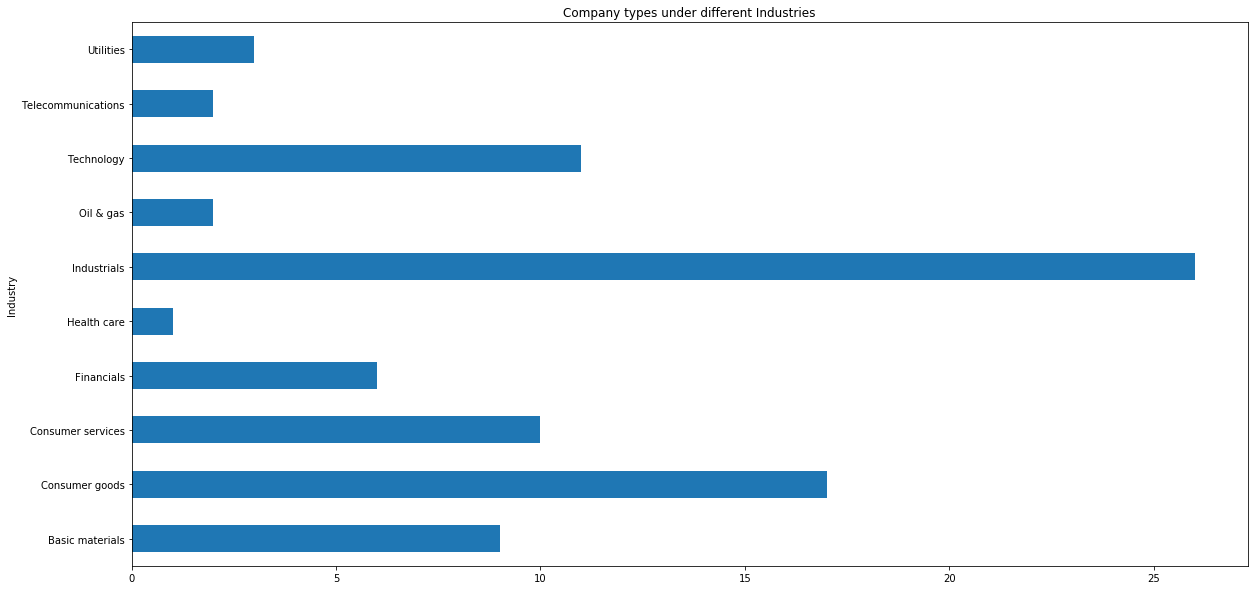

In [78]:
# Companies visualized w.r.t. type of Industries

companies_df.groupby('Industry')['Company_Type'].count().plot(kind='barh', figsize=(20,10), title='Company types under different Industries')
#sns.catplot(x='Sector', hue='Industry', col='Founded', data=companies_df, kind='count', height=7, aspect=0.8)

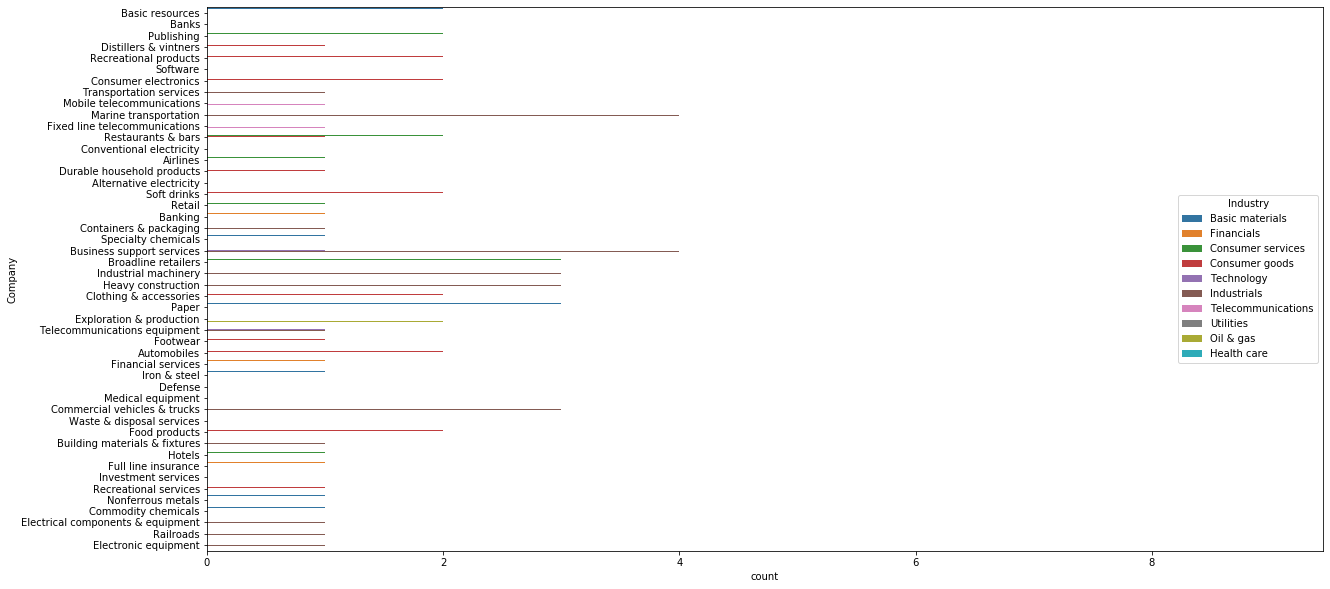

In [58]:
# Company_Types visualized specifically w.r.t. types of Industry

plt.figure(figsize=(20,10))
sns.countplot(y='Company', hue='Industry', data=companies_df)